In [4]:
from decimal import Decimal

def get_precision(value):
    decimal_value = Decimal(str(value))
    precision = decimal_value.as_tuple().exponent
    return 10 ** precision

6958824
73918440


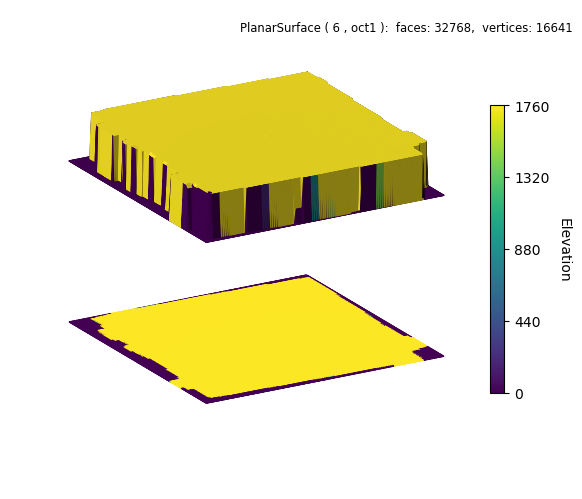

In [4]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3dlib.surface as s3d

#.. Geometric and Color Datagrid Mapping, 2

# 1. Define function to examine .....................................
# 读取npy文件
Z = np.load('./2=dsm-f.npy')
# Z = np.load('./2=dsm-f_newfloat32.npy')
Z[np.isnan(Z)] = 0
Z[Z < 0] = 0
min_value = np.min(Z[(Z >= 1500) & (Z <= 1760)])
min_change = get_precision(np.random.choice(Z.flatten()))
# 打印出Z<250的计数
print(np.count_nonzero(Z < 250))
# 打印出Z>1500的计数
print(np.count_nonzero(Z > 1500))

# Z[Z < 250] = min_value + min_change
# Z=np.load('data/jacksboro_fault_dem.npz')['elevation']
datagrid = np.flip(Z,0)

# 2. Setup and map surfaces .........................................
rez=6

surface = s3d.PlanarSurface(rez, basetype='oct1', cmap='viridis')
surface.map_cmap_from_datagrid( datagrid )
surface.map_geom_from_datagrid( datagrid, scale=0.35 )

surface.transform(translate=[0,0,0.5])  # move up to 0.5
flat_surf = copy.copy(surface)
# flatten and move down to -0.75
flat_surf.map_geom_from_op(lambda c: [c[0],c[1],-0.75*np.ones_like(c[0])] )

# 3. Construct figure, add surface, plot ............................

fig = plt.figure()
fig.text(0.975,0.975,str(surface), ha='right', va='top',
        fontsize='smaller', multialignment='right')
ax = plt.axes(projection='3d', aspect='equal')
ax.set(xlim=(-1,1), ylim=(-1,1), zlim=(-1,1) )
minc, maxc = surface.bounds['vlim']
cbar=plt.colorbar(surface.cBar_ScalarMappable, ax=ax,
        ticks=np.linspace(minc,maxc,5), shrink=0.6, pad=0  )
cbar.set_label('Elevation', rotation=270, labelpad = 15)
ax.set_axis_off()
ax.set_proj_type('ortho')
ax.view_init(elev=20, azim=60)

surface.shade(depth=0,direction=(1,0,1),contrast=1.3)
ax.add_collection3d(surface)
ax.add_collection3d(s3d.PlanarSurface(color='k').domain(zcoor=0.5))
ax.add_collection3d(flat_surf)

fig.tight_layout(pad=0)
plt.show()

0.0
0.009999991


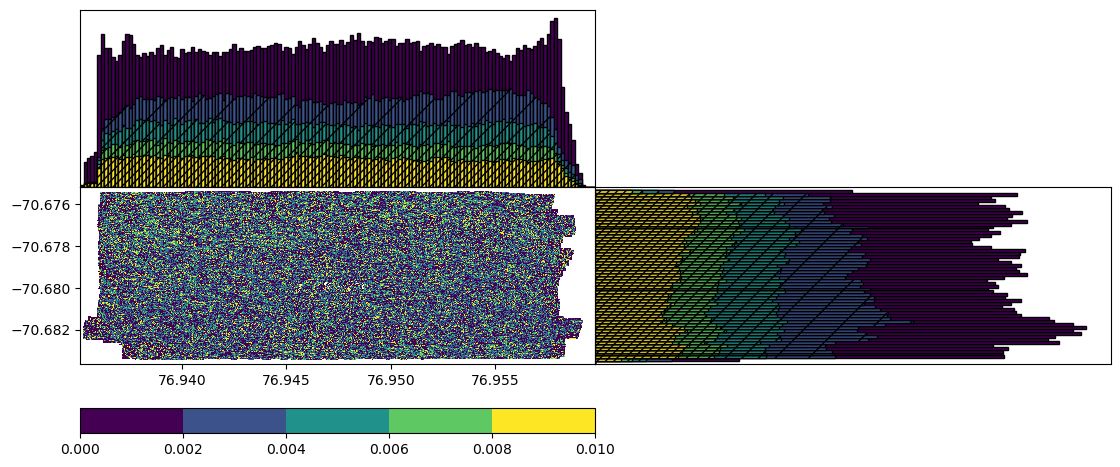

In [6]:
import arcpy
import numpy as np

# 读取栅格数据
input_tiff = './2=dsm-f_newfloat32_WGS84.tif'
raster = arcpy.Raster(input_tiff)
desc = arcpy.Describe(input_tiff)
extent = desc.extent

# 获取栅格数据的范围和分辨率
latitude_min = extent.YMin
latitude_max = extent.YMax
longitude_min = extent.XMin
longitude_max = extent.XMax
cell_size_x = desc.meanCellWidth
cell_size_y = desc.meanCellHeight
dlongitude = longitude_max-longitude_min
dlatitude = latitude_max-latitude_min


Z = np.load('./2=dsm-f_newfloat32_WGS84.npy')

min_change = get_precision(np.random.choice(Z.flatten()))

Z[Z>0.01] = 0.0000001
a=Z.shape[0]
b=Z.shape[1]
nrows, ncols = Z.shape
latitudes = np.linspace(latitude_min, latitude_max, nrows)
longitudes = np.linspace(longitude_min, longitude_max, ncols)
X, Y = np.meshgrid(longitudes, latitudes)

# 对Z进行一个按矩阵的0轴和y轴方向的形式进行值的可视化绘制，
# 将值按照最小最大值为界限划分为4个区间，分别用不同的颜色进行表示。
import numpy as np
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import copy
ZValue=copy.deepcopy(Z)
# 将 NaN 值替换为 numpy.nan
ZValue[np.isnan(ZValue)]=0.0000001
# 计算Z的最小值和最大值
Z_min, Z_max = ZValue.min(), ZValue.max()
# Z = np.nan_to_num(Z, nan=np.nan)
# 定义颜色映射
cmap = plt.get_cmap('viridis', 5)  # 使用5个颜色级别
# norm = mcolors.BoundaryNorm(np.linspace(Z_min, Z_max, 6), cmap.N)
# ——————————————————————————————————
# Create a Figure, which doesn't have to be square.
fig = plt.figure(layout='constrained')
# Create the main Axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
ax = fig.add_gridspec(top=1, right=1).subplots()
# The main Axes' aspect can be fixed.
ax.set(aspect=1)

# Set the x-axis and y-axis tick values
x_ticks = np.linspace(longitude_min, longitude_max, 150)
y_ticks = np.linspace(latitude_min, -(-latitude_max + bin_height), 60)

# Set the tick values on the ax object
# ax.set_xticks(x_ticks)
# ax.set_yticks(y_ticks)

# 如何设置ax的xy轴的刻度值分别为np.linspace(longitude_min, longitude_max, 6)，和np.linspace(latitude_min, -(-latitude_max + bin_height), 6)
# 添加颜色条
# 将colorbar放置到下方
# 绘制 pcolormesh
c = ax.pcolormesh(X, Y, Z, cmap=cmap)
print(Z_min)
print(Z_max)
bar=fig.colorbar(c, ax=ax, orientation='horizontal',boundaries=np.linspace(Z_min, Z_max, 6))

bar.ax.set_aspect(10)
# Create marginal Axes, which have 25% of the size of the main Axes.  Note that
# the inset Axes are positioned *outside* (on the right and the top) of the
# main Axes, by specifying axes coordinates greater than 1.  Axes coordinates
# less than 0 would likewise specify positions on the left and the bottom of
# the main Axes.

ax_histx = ax.inset_axes([0, 1.0, 1, 1], sharex=ax)
ax_histy = ax.inset_axes([1.0, 0, 1, 1], sharey=ax)
# ax_histx.tick_params(axis='x', which='both', length=0)
# ax_histy.tick_params(axis='y', which='both', length=0)
# 隐藏ax_histx和ax_histy的刻度标签
ax_histx.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, labeltop=False, labelright=False)
ax_histy.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, labeltop=False, labelright=False)



# 上方图

binwidth = 0.0049306
lim = (int(dlongitude/binwidth) + 1) * binwidth

# 0.0016954
# x_bins = np.arange(longitude_min, longitude_max + binwidth, binwidth)
x_bins = x_ticks
binwidth = x_bins[1] - x_bins[0]
# 定义y轴频数统计分区
y_bins = np.linspace(Z_min, Z_max, 6)

for i in range(len(x_bins) - 1):
    # print(i)
    # print(x_bins[i])
    bin_start = int((binwidth*i) / cell_size_x)
    bin_end = int((binwidth*(i+1)) / cell_size_x)
    # bin_start = x_bins[i]
    # bin_end = x_bins[i+1]
    # 计算每个bin中的频数统计
    bin_data = Z[:, bin_start:bin_end].flatten()
    # print(bin_data.shape)
    bin_data = bin_data[(bin_data != 0)&(bin_data != np.nan)]
    # print(bin_data.shape)
    counts, _ = np.histogram(bin_data, bins=y_bins)
    
    # print(counts)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
    
    for j in range(len(counts)):
        ax_histx.bar(x_bins[i] + binwidth / 2, counts[j], width=binwidth, 
                     color=colors[j], edgecolor='black', hatch='/'*j, align='center')

# 右方图
# 定义直方图的y轴bin划分
# y_bins = np.arange(latitude_min, -(-latitude_max + bin_height), bin_height)
# 换一个方法不用np.arange,要求从最小值开始，最大值结束，一共6个值，5个区间
# 定义x轴频数统计分区
y_bins = y_ticks
bin_height = y_bins[1] - y_bins[0]
x_bins = np.linspace(Z_min, Z_max, 6)
for i in range(len(y_bins) - 1):
    bin_start = int((bin_height*i) / cell_size_y)
    bin_end = int((bin_height*(i+1)) / cell_size_y)
    bin_data = Z[bin_start:bin_end, :].flatten()
    # print("删除前：")
    # print(bin_data.shape)
    bin_data = bin_data[(bin_data != 0)&(bin_data != np.nan)]
    # print("删除后：")
    # print(bin_data.shape)
    # 计算每个bin中的频数统计
    counts, _ = np.histogram(bin_data, bins=x_bins)
    
    # print(y_bins[i] + bin_height / 2)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
    # 填充颜色，从频数最高到最低依次显示
    for j in range(len(counts)):
        ax_histy.barh(y_bins[i] + bin_height / 2, counts[j], height=bin_height,color=colors[j], edgecolor='black', hatch='/'*j, align='center')
# plt.tight_layout()
plt.savefig('matrix_visualization.png', dpi=300)
# Draw the scatter plot and marginals.
# ax.scatter(x, y)
# scatter_hist(x, y, ax, ax_histx, ax_histy)
# print(x)
# print(y)
plt.show()

5274
15337
102
87


c:\Users\27593\miniconda3\envs\ArcpyClone\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\27593\miniconda3\envs\ArcpyClone\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\27593\miniconda3\envs\ArcpyClone\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\27593\miniconda3\envs\ArcpyClone\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\27593\miniconda3\envs\ArcpyClone\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


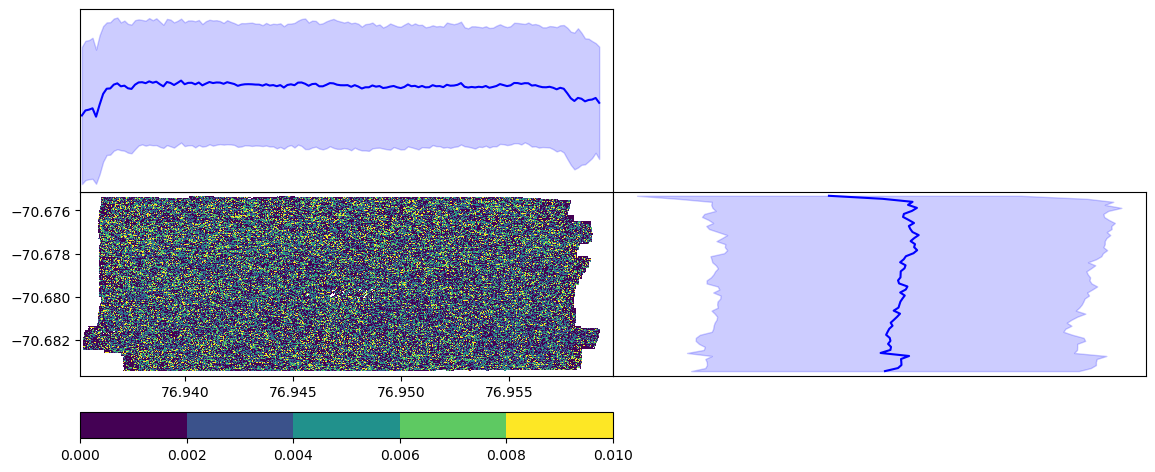

In [5]:
import arcpy
import numpy as np

# 读取栅格数据
input_tiff = './2=dsm-f_newfloat32_WGS84.tif'
raster = arcpy.Raster(input_tiff)
desc = arcpy.Describe(input_tiff)
extent = desc.extent

# 获取栅格数据的范围和分辨率
latitude_min = extent.YMin
latitude_max = extent.YMax
longitude_min = extent.XMin
longitude_max = extent.XMax
cell_size_x = desc.meanCellWidth
cell_size_y = desc.meanCellHeight
dlongitude = longitude_max-longitude_min
dlatitude = latitude_max-latitude_min


Z = np.load('./2=dsm-f_newfloat32_WGS84.npy')

min_change = get_precision(np.random.choice(Z.flatten()))

Z[Z>0.01] = 0.0000001
a=Z.shape[0]
b=Z.shape[1]
nrows, ncols = Z.shape
latitudes = np.linspace(latitude_min, latitude_max, nrows)
longitudes = np.linspace(longitude_min, longitude_max, ncols)
X, Y = np.meshgrid(longitudes, latitudes)

# 对Z进行一个按矩阵的0轴和y轴方向的形式进行值的可视化绘制，
# 将值按照最小最大值为界限划分为4个区间，分别用不同的颜色进行表示。
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import copy
ZValue=copy.deepcopy(Z)
# 将 NaN 值替换为 numpy.nan
ZValue[np.isnan(ZValue)]=0.0000001
# 计算Z的最小值和最大值
Z_min, Z_max = ZValue.min(), ZValue.max()
# Z = np.nan_to_num(Z, nan=np.nan)
# 定义颜色映射
cmap = plt.get_cmap('viridis', 5)  # 使用5个颜色级别
# norm = mcolors.BoundaryNorm(np.linspace(Z_min, Z_max, 6), cmap.N)
# ——————————————————————————————————
# Create a Figure, which doesn't have to be square.
fig = plt.figure(layout='constrained')
# Create the main Axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
ax = fig.add_gridspec(top=1, right=1).subplots()
# The main Axes' aspect can be fixed.
ax.set(aspect=1)

# Set the x-axis and y-axis tick values
x_ticks = np.linspace(longitude_min, longitude_max, 151)
y_ticks = np.linspace(latitude_min, latitude_max, 61)

print(a)
print(b)
numY=a//60
numX=b//150
print(numX)
print(numY)

# Set the tick values on the ax object
# ax.set_xticks(x_ticks)
# ax.set_yticks(y_ticks)

# 如何设置ax的xy轴的刻度值分别为np.linspace(longitude_min, longitude_max, 6)，和np.linspace(latitude_min, -(-latitude_max + bin_height), 6)
# 添加颜色条
# 将colorbar放置到下方
# 绘制 pcolormesh
c = ax.pcolormesh(X, Y, Z, cmap=cmap)
# print(Z_min)
# print(Z_max)
bar=fig.colorbar(c, ax=ax, orientation='horizontal',boundaries=np.linspace(Z_min, Z_max, 6))

bar.ax.set_aspect(10)
# Create marginal Axes, which have 25% of the size of the main Axes.  Note that
# the inset Axes are positioned *outside* (on the right and the top) of the
# main Axes, by specifying axes coordinates greater than 1.  Axes coordinates
# less than 0 would likewise specify positions on the left and the bottom of
# the main Axes.

ax_histx = ax.inset_axes([0, 1.0, 1, 1], sharex=ax)
ax_histy = ax.inset_axes([1.0, 0, 1, 1], sharey=ax)
# ax_histx.tick_params(axis='x', which='both', length=0)
# ax_histy.tick_params(axis='y', which='both', length=0)
# 隐藏ax_histx和ax_histy的刻度标签
ax_histx.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, labeltop=False, labelright=False)
ax_histy.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, labeltop=False, labelright=False)



# 上方图
x_bins = x_ticks
binwidth = x_bins[1] - x_bins[0]
# 定义y轴频数统计分区
# y_bins = np.linspace(Z_min, Z_max, 6)

means = []
stds = []
coords=[]

for i in range(len(x_bins) - 1):
    # bin_start = int((binwidth * i) / cell_size_x)
    # bin_end = int((binwidth * (i + 1)) / cell_size_x)    
    bin_start = i*numX
    bin_end = i*numX+numX
    if(bin_end>b):
        bin_end=b
    bin_data = Z[:, bin_start:bin_end].flatten()
    bin_data = bin_data[(bin_data != 0) & (~np.isnan(bin_data))]
    
    lon = (longitudes[bin_start] + longitudes[bin_end]) / 2
    coords.append(lon)
    
    mean = np.mean(bin_data)
    std = np.std(bin_data)
    
    means.append(mean)
    stds.append(std)
        
    
x_coords = [x_bins[i] + binwidth / 2 for i in range(len(x_bins) - 1)]



ax_histx.plot(coords, means, linestyle='-', color='b')
ax_histx.fill_between(coords, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='b', alpha=0.2)
# print(ax_histx.get_xticks())
# print(ax_histx.get_yticks())
# 右方图
# 定义直方图的y轴bin划分
# y_bins = np.arange(latitude_min, -(-latitude_max + bin_height), bin_height)
# 换一个方法不用np.arange,要求从最小值开始，最大值结束，一共6个值，5个区间
# 定义x轴频数统计分区
y_bins = y_ticks
bin_height = y_bins[1] - y_bins[0]

means = []
stds = []
coords=[]

for i in range(len(y_bins) - 1):
    # bin_start = int((bin_height * i) / cell_size_y)
    # bin_end = int((bin_height * (i + 1)) / cell_size_y)    
    bin_start = i*numY
    bin_end = i*numY+numY
    if(bin_end>a):
        bin_end=a
    bin_data = Z[bin_start:bin_end,:].flatten()
    bin_data = bin_data[(bin_data != 0) & (~np.isnan(bin_data))]

    # 根据bin_start和bin_end的索引，计算两者的中间索引对应的纬度值
    lat = (latitudes[bin_start] + latitudes[bin_end]) / 2
    coords.append(lat)
    # print(np.isnan(bin_data).any())
    mean = np.mean(bin_data)
    # print(mean) 
    std = np.std(bin_data)
    # print(bin_data)
    
    means.append(mean)
    stds.append(std)

# print(means)

y_coords = [y_bins[i] + bin_height / 2 for i in range(len(y_bins) - 1)]

# 剔除means中的nan值

# print(len(y_coords))
# print(len(means))
ax_histy.plot(means, coords, linestyle='-', color='b')
ax_histy.fill_betweenx(coords, np.array(means) - np.array(stds), np.array(means) + np.array(stds), color='b', alpha=0.2)
# 检查ax_histy的刻度值并打印出来
# print(ax_histy.get_xticks())
# print(ax_histy.get_yticks())

plt.show()